# Analisando a Violência no Rio de Janeiro

# Roubo e furto de veículos



## Entendendo o problema

O Estado do Rio de Janeiro é um destino turístico conhecido internacionalme, famoso pelas praias, música, cultura e infelizmente, pela sua reputação no que diz respeito à segurança. 

Para se sentirem mais seguros, a opção de usar um automóvel parece ser mais atraente em relação à se locomover por tranporte público em algumas regiões.

Entretanto, possuir um automóvel cria a possibilidade que ele seja subtraido de forma indesejada, em outras palavras, para ter um carro roubado, você precisa ter um carro! 

Caso um morador do Estado do Rio de Janeiro esteja pensando em ter um (ou se já possui um) automóvel, pode ter algumas dúvidas em relação aos dados de roubo de veículos.

## Questões a serem repondidas

Levantaremos algumas perguntas que podem ser respondidas com a análise esploratória de dados da segurança pública do Estado do Rio de Janeiro.

Antes de começar, vamos entender alguns termos:

* __Furto:__ "_É a subtração de algo móvel pertencente a outra pessoa para si ou para outrem. Caracteriza-se pela ação de tirar de outra pessoa algo móvel que lhe pertença, sem a sua permissão, com o objetivo de domínio definitivo do bem."_ [ref](https://alvesaraujoadv.jusbrasil.com.br/artigos/447365236/qual-a-diferenca-entre-furto-e-roubo)

* __Roubo:__ _" É considerado um crime mais grave do que o furto, isto porque a ação principal é a mesma, ou seja, tirar de alguém um bem móvel. Contudo, no roubo para a subtração do bem há o emprego de grave ameaça ou violência contra a pessoa, ou por qualquer outro meio que reduza a capacidade de resistência da vítima."_ [ref](https://alvesaraujoadv.jusbrasil.com.br/artigos/447365236/qual-a-diferenca-entre-furto-e-roubo)

Depois de entender melhor os termos técnicos jurídicos, vamos as dúvidas:

1. Os índices de roubo e furto de veículos, vem aumentando ao longo dos anos?
2. Qual época do ano são registrados mais roubos e furtos de veículos?
3. Em qual região do Estado do Rio de Janeiro são registrados mais roubos e furtos de veículos?


## Obtenção dos Dados

Os dados foram obtidos do site do Intituto de Segurança Pública do Governo do Estado do Rio de Janeiro [ISP - Dados Abertos](http://www.ispdados.rj.gov.br).

Esse portal contém dados de segurança pública do Estado do Rio de Janeiro assim como um [_dashboard_](https://www.ispvisualizacao.rj.gov.br:4434/index.html) interativo muito interessante desenvolvido no _Tableau_.

### Importando os dados

In [77]:
# Carregar pacote
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Ler arquivo csv
df = pd.read_csv(
    'http://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv',
    encoding='latin-1', # artifício para a leitura de caracteres com acentuação
    sep=';', # O separadaor desse dataset é ';' -> comum no Brasil, pois usamos ',' como separador de decimal
    )

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (26,30,37,45,46,47,49,50,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Análise Inicial e preparação dos Dados

### Tamanho do dataset


In [78]:
print(f'Número de limhas: {df.shape[0]}')
print(f'Número de colunas: {df.shape[1]}')

Número de limhas: 27450
Número de colunas: 65


### Nome das colunas

In [79]:
df.columns

Index(['CISP', 'mes', 'vano', 'mes_ano', 'AISP', 'RISP', 'munic', 'mcirc',
       'Regiao', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
       'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver'

### Dicionário de variáveis com as colunas importantes

* `mes`: Mês da comunicação da ocorrência
* `vano`: Ano da comunicação da ocorrência
* `Regiao`: 1-Baixada; 2-Capital; 3-Grande Niterói; 4-Interior
* `roubo_veiculo`: Roubo de veículo
* `total_roubos`: Total de roubos (incluindo veículos)
* `furto_veiculos`: Furto de veículo
* `total_furtos`: Total de furtos (incluindo veículos)


In [0]:
# Limpeza do dataset
df = df.loc[:,['mes', 'vano', 'Regiao', 'roubo_veiculo', 'total_roubos', 'furto_veiculos', 'total_furtos']]

# Reirar dados de 2020 (incompleto)
df = df[df['vano'] != 2020]

In [81]:
print(f'Número de limhas: {df.shape[0]}')
print(f'Número de colunas: {df.shape[1]}')

Número de limhas: 27313
Número de colunas: 7


### Valores faltantes

In [82]:
df.isnull().sum()

mes               0
vano              0
Regiao            0
roubo_veiculo     0
total_roubos      0
furto_veiculos    0
total_furtos      0
dtype: int64

### Visualização das primeiras linhas

In [83]:
df.head()

,mes,vano,Regiao,roubo_veiculo,total_roubos,furto_veiculos,total_furtos
0,1,2003,Capital,5,100,12,169
1,1,2003,Capital,9,82,9,115
2,1,2003,Capital,11,123,28,216
3,1,2003,Capital,27,143,17,90
4,1,2003,Capital,23,55,12,35


## Respondendo às perguntas

### 1. Os índices de roubo e furto de veículos, vem aumentando ao longo dos anos?

#### 1.1 Roubos em relação ao tempo

__Total de roubos por ano__

In [84]:
roubos = pd.DataFrame(df.groupby(['vano']).total_roubos.sum()/1000)
media = roubos.total_roubos.mean()
maximo = roubos.total_roubos.max()
ano = int(roubos.index[roubos.total_roubos == maximo].values)
print(roubos)
print()
print('Total de roubos')
print('-'*60)
print(f'Média de roubos por ano: {media:.2f} mil')
print(f'O pior ano foi de {ano} com {maximo:.2f} mil roubos')

      total_roubos
vano              
2003       118.834
2004       110.903
2005       113.437
2006       124.087
2007       137.422
2008       141.175
2009       138.280
2010       120.300
2011       106.688
2012       103.775
2013       126.190
2014       157.995
2015       147.933
2016       208.781
2017       230.437
2018       231.606
2019       199.347

Total de roubos
------------------------------------------------------------
Média de roubos por ano: 148.07 mil
O pior ano foi de 2018 com 231.61 mil roubos


__Total de roubos de veículos por ano__

In [85]:
roubos = pd.DataFrame(df.groupby(['vano']).roubo_veiculo.sum()/1000)
media = roubos.roubo_veiculo.mean()
maximo = roubos.roubo_veiculo.max()
ano = int(roubos.index[roubos.roubo_veiculo == maximo].values)
print(roubos)
print()
print('Roubo de veículos')
print('-'*60)
print(f'Média de roubos por ano: {media:.2f} mil')
print(f'O pior ano foi de {ano} com {maximo:.2f} mil roubos')
print(f'Com {maximo-media:.2f} mil roubos acima da média ({(maximo-media)/media*100:.2f}%)')

      roubo_veiculo
vano               
2003         33.531
2004         32.408
2005         32.690
2006         34.324
2007         31.490
2008         27.847
2009         25.036
2010         20.052
2011         18.773
2012         22.065
2013         28.002
2014         32.651
2015         31.035
2016         41.696
2017         54.366
2018         52.097
2019         39.749

Roubo de veículos
------------------------------------------------------------
Média de roubos por ano: 32.81 mil
O pior ano foi de 2017 com 54.37 mil roubos
Com 21.55 mil roubos acima da média (65.69%)


__Proporção de roubo de veículos em relação ao total de roubos registrados__

In [86]:
(df.groupby(['vano']).roubo_veiculo.sum() / df.groupby(['vano']).total_roubos.sum())

vano
2003    0.282167
2004    0.292219
2005    0.288178
2006    0.276612
2007    0.229148
2008    0.197252
2009    0.181053
2010    0.166683
2011    0.175962
2012    0.212623
2013    0.221903
2014    0.206658
2015    0.209791
2016    0.199712
2017    0.235926
2018    0.224938
2019    0.199396
dtype: float64

> A média da proporção de roubos de veículos em relação ao total de roubos foi de __22%__.

__Visualização dos roubos em relação ao tempo__

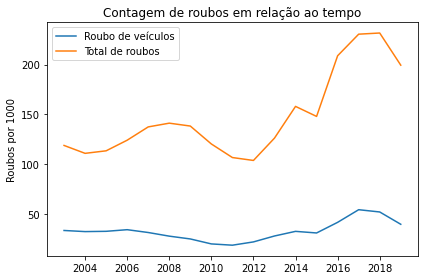

In [87]:
plt.plot(df.groupby(['vano']).roubo_veiculo.sum()/1000)
plt.plot(df.groupby(['vano']).total_roubos.sum()/1000)
plt.title('Contagem de roubos em relação ao tempo')
plt.ylabel('Roubos por 1000')
plt.legend(['Roubo de veículos', 'Total de roubos'])
plt.tight_layout()

> Analizando o gráfico de forma subjetiva, o número de ocorrências de roubo de veículos não parece estar aumentando ao longo dos anos.

#### 1.2 Furtos em relação ao tempo

__Total de furtos por ano__

In [88]:
furtos = pd.DataFrame(df.groupby(['vano']).total_furtos.sum()/1000)
media = furtos.total_furtos.mean()
maximo = furtos.total_furtos.max()
ano = int(furtos.index[furtos.total_furtos == maximo].values)
print(furtos)
print()
print('Total de furtos')
print('-'*60)
print(f'Média de furtos por ano: {media:.2f} mil')
print(f'O pior ano foi de {ano} com {maximo:.2f} mil furtos')

      total_furtos
vano              
2003       119.533
2004       118.770
2005       126.333
2006       140.874
2007       157.150
2008       168.945
2009       170.245
2010       174.776
2011       176.000
2012       178.739
2013       182.815
2014       182.340
2015       179.845
2016       169.238
2017       145.290
2018       143.870
2019       154.521

Total de furtos
------------------------------------------------------------
Média de furtos por ano: 158.19 mil
O pior ano foi de 2013 com 182.81 mil furtos


> O ano com maior número de ocorrências de furtos foi em 2013 com __182 mil__ furtos.

__Total de furtos de veículos por ano__

In [89]:
furtos = pd.DataFrame(df.groupby(['vano']).furto_veiculos.sum()/1000)
media = furtos.furto_veiculos.mean()
maximo = furtos.furto_veiculos.max()
ano = int(furtos.index[furtos.furto_veiculos == maximo].values)
print(furtos)
print()
print('Furtos de veículos')
print('-'*60)
print(f'Média de furtos por ano: {media:.2f} mil')
print(f'O pior ano foi de {ano} com {maximo:.2f} mil furtos')
print(f'Com {maximo-media:.2f} mil furtos acima da média ({(maximo-media)/media*100:.2f}%)')

      furto_veiculos
vano                
2003          19.942
2004          19.449
2005          21.322
2006          22.637
2007          21.668
2008          21.628
2009          20.342
2010          18.752
2011          15.593
2012          16.263
2013          17.668
2014          17.683
2015          16.944
2016          16.759
2017          15.708
2018          15.794
2019          15.595

Furtos de veículos
------------------------------------------------------------
Média de furtos por ano: 18.46 mil
O pior ano foi de 2006 com 22.64 mil furtos
Com 4.18 mil furtos acima da média (22.66%)


__Proporção de furto de veículos em relação ao total de furtos registrados__

In [90]:
(df.groupby(['vano']).furto_veiculos.sum() / df.groupby(['vano']).total_furtos.sum())

vano
2003    0.166833
2004    0.163753
2005    0.168776
2006    0.160690
2007    0.137881
2008    0.128018
2009    0.119487
2010    0.107292
2011    0.088597
2012    0.090987
2013    0.096644
2014    0.096978
2015    0.094214
2016    0.099026
2017    0.108115
2018    0.109780
2019    0.100925
dtype: float64

> A média da proporção de furtos de veículos em relação ao total de furtos foi de __11%__.

__Visualização dos furtos em relação ao tempo__

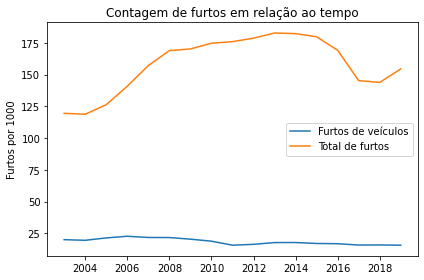

In [91]:
plt.plot(df.groupby(['vano']).furto_veiculos.sum()/1000)
plt.plot(df.groupby(['vano']).total_furtos.sum()/1000)
plt.title('Contagem de furtos em relação ao tempo')
plt.ylabel('Furtos por 1000')
plt.legend(['Furtos de veículos', 'Total de furtos'])
plt.tight_layout()

> Analizando o gráfico de forma subjetiva, o número de ocorrências de furto de veículos não parece estar aumentando ao longo dos anos.

### 2. Qual época do ano são registrados mais roubos e furtos de veículos?

#### 2.1 Roubos em relação à época do ano

__Total de roubos por mês__

In [92]:
roubos = pd.DataFrame(df.groupby(['mes']).total_roubos.sum()/1000)
media = roubos.total_roubos.mean()
maximo = roubos.total_roubos.max()
mes = int(roubos.index[roubos.total_roubos == maximo].values)
print(roubos)
print()
print('Total de roubos')
print('-'*60)
print(f'Média de roubos por mês: {media:.2f} mil')
print(f'O pior mês foi o mês {mes} com {maximo:.2f} mil roubos')

     total_roubos
mes              
1         208.079
2         198.853
3         222.259
4         217.687
5         223.258
6         206.961
7         208.126
8         208.224
9         200.687
10        211.915
11        204.972
12        206.169

Total de roubos
------------------------------------------------------------
Média de roubos por mês: 209.77 mil
O pior mês foi o mês 5 com 223.26 mil roubos


__Total de roubos de veículos por mês__

In [93]:
roubos = pd.DataFrame(df.groupby(['mes']).roubo_veiculo.sum()/1000)
media = roubos.roubo_veiculo.mean()
maximo = roubos.roubo_veiculo.max()
mes = int(roubos.index[roubos.roubo_veiculo == maximo].values)
print(roubos)
print()
print('Roubo de veículos')
print('-'*60)
print(f'Média de roubos por mês: {media:.2f} mil')
print(f'O pior mês foi o mês {mes} com {maximo:.2f} mil roubos')
print(f'Com {maximo-media:.2f} mil roubos acima da média ({(maximo-media)/media*100:.2f}%)')

     roubo_veiculo
mes               
1           49.031
2           46.582
3           51.358
4           49.133
5           48.527
6           44.354
7           43.813
8           43.792
9           43.420
10          46.203
11          44.911
12          46.688

Roubo de veículos
------------------------------------------------------------
Média de roubos por mês: 46.48 mil
O pior mês foi o mês 3 com 51.36 mil roubos
Com 4.87 mil roubos acima da média (10.48%)


__Proporção de roubo de veículos em relação ao total de roubos registrados__

In [94]:
(df.groupby(['mes']).roubo_veiculo.sum() / df.groupby(['mes']).total_roubos.sum())

mes
1     0.235636
2     0.234253
3     0.231073
4     0.225705
5     0.217358
6     0.214311
7     0.210512
8     0.210312
9     0.216357
10    0.218026
11    0.219108
12    0.226455
dtype: float64

> A média da proporção de roubos de veículos em relação ao total de roubos foi de __22%__.

__Visualização dos roubos em relação ao tempo__

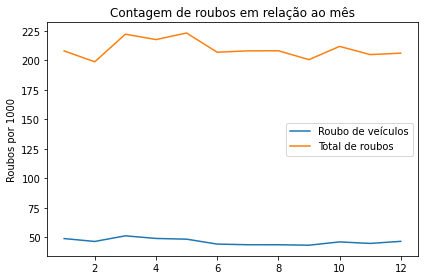

In [95]:
plt.plot(df.groupby(['mes']).roubo_veiculo.sum()/1000)
plt.plot(df.groupby(['mes']).total_roubos.sum()/1000)
plt.title('Contagem de roubos em relação ao mês')
plt.ylabel('Roubos por 1000')
plt.legend(['Roubo de veículos', 'Total de roubos'])
plt.tight_layout()

> Analizando o gráfico de forma subjetiva, o número de ocorrências de roubo de automóveis não parece apresentar algum tipo de sazonalidade.

#### 2.2 Furtos em relação à época do ano

__Total de furtos por mês__

In [96]:
furtos = pd.DataFrame(df.groupby(['mes']).total_furtos.sum()/1000)
media = furtos.total_furtos.mean()
maximo = furtos.total_furtos.max()
mes = int(furtos.index[furtos.total_furtos == maximo].values)
print(furtos)
print()
print('Total de furtos')
print('-'*60)
print(f'Média de furtos por mês: {media:.2f} mil')
print(f'O pior mês foi o mês {mes} com {maximo:.2f} mil furtos')

     total_furtos
mes              
1         233.489
2         232.504
3         236.897
4         216.617
5         227.065
6         215.385
7         221.501
8         222.844
9         217.236
10        223.502
11        215.975
12        226.269

Total de furtos
------------------------------------------------------------
Média de furtos por mês: 224.11 mil
O pior mês foi o mês 3 com 236.90 mil furtos


__Total de furtos de veículos por mês__

In [97]:
furtos = pd.DataFrame(df.groupby(['mes']).furto_veiculos.sum()/1000)
media = furtos.furto_veiculos.mean()
maximo = furtos.furto_veiculos.max()
mes = int(furtos.index[furtos.furto_veiculos == maximo].values)
print(furtos)
print()
print('Roubo de veículos')
print('-'*60)
print(f'Média de furtos por mês: {media:.2f} mil')
print(f'O pior mês foi o mês {mes} com {maximo:.2f} mil furtos')
print(f'Com {maximo-media:.2f} mil furtos acima da média ({(maximo-media)/media*100:.2f}%)')

     furto_veiculos
mes                
1            27.524
2            25.616
3            27.379
4            26.156
5            27.221
6            25.685
7            25.840
8            26.128
9            25.193
10           26.330
11           25.507
12           25.168

Roubo de veículos
------------------------------------------------------------
Média de furtos por mês: 26.15 mil
O pior mês foi o mês 1 com 27.52 mil furtos
Com 1.38 mil furtos acima da média (5.27%)


__Proporção de furto de veículos em relação ao total de furtos registrados__

In [98]:
(df.groupby(['mes']).furto_veiculos.sum() / df.groupby(['mes']).total_furtos.sum())

mes
1     0.117881
2     0.110174
3     0.115573
4     0.120748
5     0.119882
6     0.119252
7     0.116659
8     0.117248
9     0.115971
10    0.117807
11    0.118102
12    0.111230
dtype: float64

> A média da proporção de furtos de veículos em relação ao total de furtos foi de __11%__.

__Visualização dos furtos em relação ao mês__

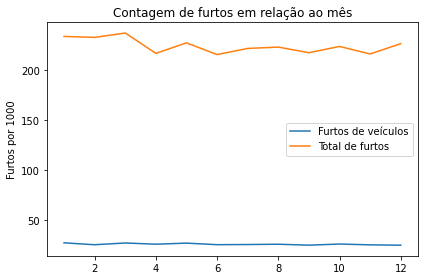

In [99]:
plt.plot(df.groupby(['mes']).furto_veiculos.sum()/1000)
plt.plot(df.groupby(['mes']).total_furtos.sum()/1000)
plt.title('Contagem de furtos em relação ao mês')
plt.ylabel('Furtos por 1000')
plt.legend(['Furtos de veículos', 'Total de furtos'])
plt.tight_layout()

> Analizando o gráfico de forma subjetiva, o número de ocorrências de furto de automóveis não parece apresentar algum tipo de sazonalidade.

### 3. Em qual região do Estado do Rio de Janeiro são registrados mais roubos e furtos de veículos?

#### 3.1 Roubos por região


__Regiões com os maiores índices de roubos__

In [100]:
df.groupby('Regiao', sort=False).roubo_veiculo.sum()


Regiao
Capital               304126
Baixada Fluminense    151872
Interior               25760
Grande Niterói         64204
Capital                 8525
Interior                 844
Grande Niterói          2481
Name: roubo_veiculo, dtype: int64

__Regiões com os menores índices de roubos__

#### 3.2 Furtos por região

In [101]:
df.groupby('Regiao', sort=False).furto_veiculos.sum()

Regiao
Capital               147029
Baixada Fluminense     60250
Interior               58287
Grande Niterói         42658
Capital                 3249
Interior                1377
Grande Niterói           897
Name: furto_veiculos, dtype: int64

# Conclusões

Analizando esse dataset, o número de casos cadastrados de roubos e furtos de veículos não parece estar aumentando ao longo dos últimos anos.

__Roubos__

* Na média, roubos de veículos correnpondem à 20% do total de roubos registrados no Estado do Rio de Janeiro.

* O ano com o maior número de roubos cadastrados foi o de 2017 com 54.37 mil roubos, que corresponde 65,7% acima da média.

* O mês de Maio é o mês com maior número de registros de roubos, com 10,5% acima da média.

* A Capital do Rio de Janeiro tem o maior número de registro de roubos do Estado do Rio De janeiro.

__Furtos__

* Na média, furtos de veículos correnpondem à 11% do total de furtos registrados no Estado do Rio de Janeiro.

* O ano com o maior número de furtos cadastrados foi o de 2006 com 22,64 mil furtos, que corresponde 22,7% acima da média.

* O mês de Janeiro é o mês com maior número de registros de furtos, com 5,3% acima da média.

* A Capital do Rio de Janeiro tem o maior número de registro de furto do Estado do Rio De janeiro.